Trying to load data in with Python...

In [2]:
# packages
import pandas as pd
import geopandas as gpd
import matplotlib # Base python plotting library
import matplotlib.pyplot as plt # Submodule of matplotlib
import arcpy

arcpy.env.overwriteOutput = True

# To display plots, maps, charts etc in the notebook
%matplotlib inline  

# assign ref_path
ref_path = r"C:/Users/lrosenth/OneDrive - California Air Resources Board/Desktop/Local_reference_data"
print(ref_path)


C:/Users/lrosenth/OneDrive - California Air Resources Board/Desktop/Local_reference_data


Read in shapefiles

In [3]:
# load in CA boundary

# California boundary
CA = gpd.read_file(ref_path + '/CA boundary/ca-state-boundary/CA_State_TIGER2016.shp')
CA.crs


<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
# load responsibility areas
shp_path = r"/Responsibility areas/California_State_Responsibility_Areas/California_State_Responsibility_Areas.shp"
shp_path = ref_path + shp_path
RA = gpd.read_file(shp_path)

   OBJECTID  SRA     SHAPEAREA      SHAPELEN  \
0         1  FRA  1.942792e+05   7564.025543   
1         2  FRA  9.586868e+06  18286.672318   
2         3  FRA  3.806679e+03    322.823468   
3         4  FRA  2.907037e+03    300.449061   
4         5  FRA  5.624966e+04    948.971121   

                                            geometry  
0  POLYGON ((-13012454.894 3836284.401, -13015219...  
1  POLYGON ((-13038580.276 3839142.044, -13038580...  
2  POLYGON ((-13036319.707 3840712.673, -13036311...  
3  POLYGON ((-13037132.670 3841041.483, -13037013...  
4  POLYGON ((-13034702.928 3840922.070, -13034932...  


<AxesSubplot: >

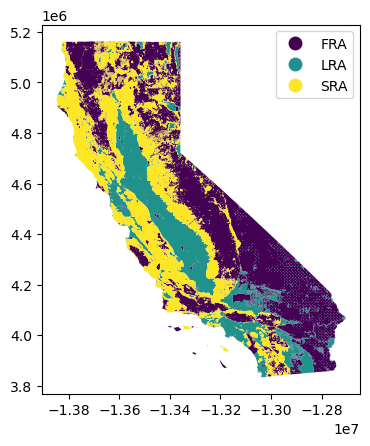

In [5]:
# check out the data
print(RA.head())
RA.plot(column="SRA", cmap='viridis', legend=True)

In [6]:
import os
os.path.dirname(shp_path) 

'C:/Users/lrosenth/OneDrive - California Air Resources Board/Desktop/Local_reference_data/Responsibility areas/California_State_Responsibility_Areas'

In [16]:
print("Spatial analyst: " + arcpy.CheckExtension("Spatial"))
print("3D analyst: " + arcpy.CheckExtension("3D"))

Spatial analyst: Available
3D analyst: Unavailable


In [10]:
arcpy.env.workspace = None # ref_path # tried setting this too, but didn't fix the issue
inFeatures = shp_path
valField = "SRA"
outRaster = os.path.dirname(shp_path) + "/RA"
assignmentType = "MAXIMUM_COMBINED_AREA"
cellSize = 375

print(inFeatures)
print(outRaster)

arcpy.conversion.PolygonToRaster(inFeatures, valField, outRaster, 
                                 assignmentType, cellSize)



C:/Users/lrosenth/OneDrive - California Air Resources Board/Desktop/Local_reference_data/Responsibility areas/California_State_Responsibility_Areas/California_State_Responsibility_Areas.shp
C:/Users/lrosenth/OneDrive - California Air Resources Board/Desktop/Local_reference_data/Responsibility areas/California_State_Responsibility_Areas/RA


ExecuteError: Failed to execute. Parameters are not valid.
ERROR 000824: The tool is not licensed.
Failed to execute (PolygonToRaster).


In [9]:
# I copied this from the run inside of ArcGIS Pro. Also doesn't work.

arcpy.conversion.PolygonToRaster(
    in_features=r"C:\Users\lrosenth\OneDrive - California Air Resources Board\Documents\ArcGIS\Projects\MyProject\MyProject.gdb\FRAP_PUBLICATION.SRA23_1",
    value_field="SRA",
    out_rasterdataset=r"C:\Users\lrosenth\OneDrive - California Air Resources Board\Documents\ArcGIS\Projects\MyProject\MyProject.gdb\SRA_raster",
    cell_assignment="MAXIMUM_COMBINED_AREA",
    priority_field="NONE",
    cellsize=375,
    build_rat="BUILD"
)

ExecuteError: Failed to execute. Parameters are not valid.
ERROR 000824: The tool is not licensed.
Failed to execute (PolygonToRaster).
